/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_89814/3350689421.py:124: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


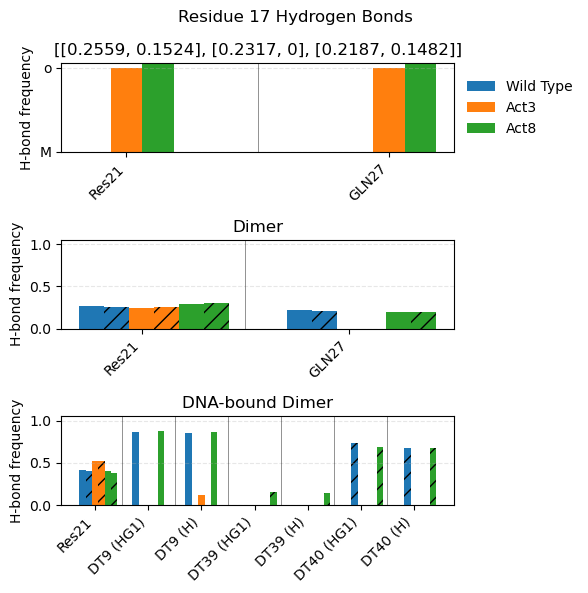

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
WTM17 = [0.2559, 0.1524]
A3M17 = [0.2317, 0]
A8M17 = [0.2187, 0.1482]
M17_partners = ['Res21', 'GLN27']

WTdim1_17 = [0.2667, 0.2142]
WTdim2_17 = [0.2582, 0.2052]
A3dim1_17 = [0.2458, 0]
A3dim2_17 = [0.2540, 0]
A8dim1_17 = [0.2948, 0.1959]
A8dim2_17 = [0.2995, 0.1943]
dim17_partners = ['Res21', 'GLN27']

WTdna1_17 = [0.4183, 0.8668, 0.8510, 0, 0, 0, 0] 
WTdna2_17 = [0.4085, 0, 0, 0, 0, 0.7415, 0.6746]
A3dna1_17 = [0.5197, 0, 0.1185, 0, 0, 0, 0]
A3dna2_17 = [0.5192, 0, 0, 0, 0, 0, 0]
A8dna1_17 = [0.4099, 0.8757, 0.8671, 0, 0, 0, 0]
A8dna2_17 = [0.3768, 0, 0, 0.1609, 0.1493, 0.6837, 0.6787]
dna17_partners = ['Res21', 'DT9 (HG1)', 'DT9 (H)', 'DT39 (HG1)', 'DT39 (H)', 'DT40 (HG1)', 'DT40 (H)']

# --- Plot Setup ---
fig, axs = plt.subplots(3, 1, figsize=(6, 6), constrained_layout=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['Wild Type', 'Act3', 'Act8']
hatch_sub2 = '//'

# --- Function to plot each row ---
from matplotlib.patches import Patch

def plot_pairwise_bars(ax, partners, sub1_data, sub2_data, title="", show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (sub1, sub2, color, label) in enumerate(zip(sub1_data, sub2_data, colors, labels)):
        shift = (i - 1) * group_spacing
        pos1 = x + shift
        pos2 = x + shift + bar_width

        # Subunit 1
        ax.bar(pos1, sub1, width=bar_width, color=color, label=label if show_legend else None)

        # Subunit 2
        ax.bar(pos2, sub2, width=bar_width, color=color, hatch=hatch_sub2)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right')
    ax.set_ylim(0, 1.05)
    ax.set_ylabel('H-bond frequency')
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
        # Create custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            Patch(facecolor='gray', label='Subunit 1'),
            Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(handles=legend_elements, title='Variant & Subunit', loc='upper center')


def plot_monomer_bars(ax, partners, data_by_variant, title, show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (data, color, label) in enumerate(zip(data_by_variant, colors, labels)):
        shift = (i - 1) * group_spacing/2
        ax.bar(x + shift, data, width=bar_width, color=color, label=label)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right')
    ax.set_ylim(0, 1.05)
    ax.set_ylabel('H-bond frequency')
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
    # Custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            #Patch(facecolor='gray', label='Subunit 1'),
            #Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(
            handles=legend_elements,
            #title='Variant & Subunit',
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),  # push right of axes, vertically centered
            borderaxespad=0.0,
            frameon=False
        )



# Plot monomer (no spacing issue)
plot_monomer_bars(axs[0], M17_partners, 'Monomer', [WTM17, A3M17, A8M17], show_legend=True)

# Plot dimer and DNA-bound dimer with legends and subunit hatching
plot_pairwise_bars(axs[1], dim17_partners, [WTdim1_17, A3dim1_17, A8dim1_17], [WTdim2_17, A3dim2_17, A8dim2_17], title='Dimer')
plot_pairwise_bars(axs[2], dna17_partners, [WTdna1_17, A3dna1_17, A8dna1_17], [WTdna2_17, A3dna2_17, A8dna2_17], title='DNA-bound Dimer')

plt.suptitle('Residue 17 Hydrogen Bonds')
plt.tight_layout()



/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_89814/1579147215.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


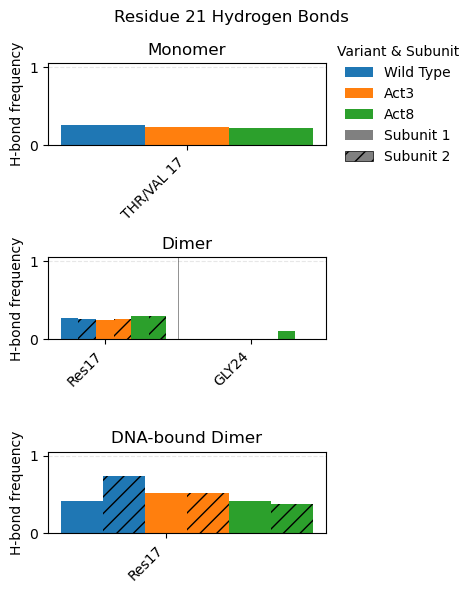

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
WTM21 = [0.2559]
A3M21 = [0.2317]
A8M21 = [0.2187]
M21_partners = ['THR/VAL 17']

WTdim1_21 = [0.2667, 0]
WTdim2_21 = [0.2582, 0]
A3dim1_21 = [0.2458, 0]
A3dim2_21 = [0.2540, 0]
A8dim1_21 = [0.2948, 0.1039]
A8dim2_21 = [0.2995, 0]
dim21_partners = ['Res17', 'GLY24']

WTdna1_21 = [0.4183] 
WTdna2_21 = [0.4085]
A3dna1_21 = [0.5197]
A3dna2_21 = [0.5192]
A8dna1_21 = [0.4099]
A8dna2_21 = [0.3768]
dna21_partners = ['Res17']

# --- Plot Setup ---
fig, axs = plt.subplots(3, 1, figsize=(5, 6), constrained_layout=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['WT', 'Act3', 'Act8']
hatch_sub2 = '//'
# Plot monomer (no spacing issue)
plot_monomer_bars(axs[0], M21_partners, [WTM21, A3M21, A8M21], show_legend=True)

# Plot dimer and DNA-bound dimer with legends and subunit hatching
plot_pairwise_bars(axs[1], dim21_partners, [WTdim1_21, A3dim1_21, A8dim1_21], [WTdim2_21, A3dim2_21, A8dim2_21], title='Dimer')
plot_pairwise_bars(axs[2], dna21_partners, [WTdna1_21, A3dna1_21, A8dna1_21], [WTdna2_17, A3dna2_21, A8dna2_21], title='DNA-bound Dimer')

plt.suptitle('Residue 21 Hydrogen Bonds')
plt.tight_layout()

/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_89814/1384219345.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


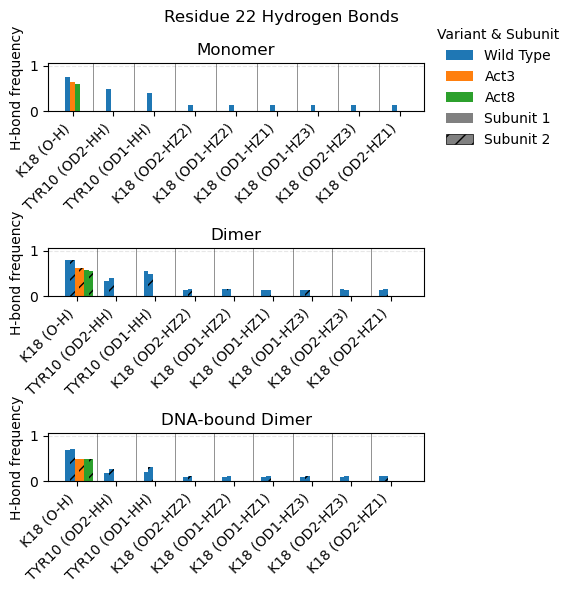

In [4]:
# --- Data ---
WTM22 = [0.7566, 0.4960, 0.3949, 0.1504, 0.1489, 0.1476, 0.1467, 0.1446, 0.1435]
A3M22 = [0.6318, 0, 0, 0, 0, 0, 0, 0, 0]
A8M22 = [0.5920, 0, 0, 0, 0, 0, 0, 0, 0]
M22_partners = ['K18 (O-H)', 'TYR10 (OD2-HH)', 'TYR10 (OD1-HH)', 'K18 (OD2-HZ2)', 
                'K18 (OD1-HZ2)', 'K18 (OD1-HZ1)', 'K18 (OD1-HZ3)', 'K18 (OD2-HZ3)', 'K18 (OD2-HZ1)']

WTdim1_22 = [0.7887, 0.3420, 0.5507, 0.1506, 0.1542, 0.1500, 0.1475, 0.1524, 0.1507]
WTdim2_22 = [0.7909, 0.3957, 0.4827, 0.1530, 0.1535, 0.1511, 0.1512, 0.1496, 0.1531]
A3dim1_22 = [0.6300, 0, 0, 0, 0, 0, 0, 0, 0]
A3dim2_22 = [0.6237, 0, 0, 0, 0, 0, 0, 0, 0]
A8dim1_22 = [0.5673, 0, 0, 0, 0, 0, 0, 0, 0]
A8dim2_22 = [0.5591, 0, 0, 0, 0, 0, 0, 0, 0]
dim22_partners = ['K18 (O-H)', 'TYR10 (OD2-HH)', 'TYR10 (OD1-HH)', 'K18 (OD2-HZ2)', 
                'K18 (OD1-HZ2)', 'K18 (OD1-HZ1)', 'K18 (OD1-HZ3)', 'K18 (OD2-HZ3)', 'K18 (OD2-HZ1)']

WTdna1_22 = [0.6788, 0.1805, 0.1978, 0.1065, 0.1057, 0.1043, 0.1069, 0.1073, 0.1088] 
WTdna2_22 = [0.6981, 0.2699, 0.3187, 0.1217, 0.1200, 0.1202, 0.1204, 0.1201, 0.1268]
A3dna1_22 = [0.4830, 0, 0, 0, 0, 0, 0, 0, 0]
A3dna2_22 = [0.4863, 0, 0, 0, 0, 0, 0, 0, 0]
A8dna1_22 = [0.4930, 0, 0, 0, 0, 0, 0, 0, 0]
A8dna2_22 = [0.4837, 0, 0, 0, 0, 0, 0, 0, 0]
dna22_partners = ['K18 (O-H)', 'TYR10 (OD2-HH)', 'TYR10 (OD1-HH)', 'K18 (OD2-HZ2)', 
                'K18 (OD1-HZ2)', 'K18 (OD1-HZ1)', 'K18 (OD1-HZ3)', 'K18 (OD2-HZ3)', 'K18 (OD2-HZ1)']

# --- Plot Setup ---
fig, axs = plt.subplots(3, 1, figsize=(6, 6), constrained_layout=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['WT', 'Act3', 'Act8']
hatch_sub2 = '//'
# Plot monomer (no spacing issue)
plot_monomer_bars(axs[0], M22_partners, [WTM22, A3M22, A8M22], show_legend=True)

# Plot dimer and DNA-bound dimer with legends and subunit hatching
plot_pairwise_bars(axs[1], dim22_partners, [WTdim1_22, A3dim1_22, A8dim1_22], [WTdim2_22, A3dim2_22, A8dim2_22], title='Dimer')
plot_pairwise_bars(axs[2], dna22_partners, [WTdna1_22, A3dna1_22, A8dna1_22], [WTdna2_22, A3dna2_22, A8dna2_22], title='DNA-bound Dimer')

plt.suptitle('Residue 22 Hydrogen Bonds')
plt.tight_layout()

/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_89814/1952134591.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


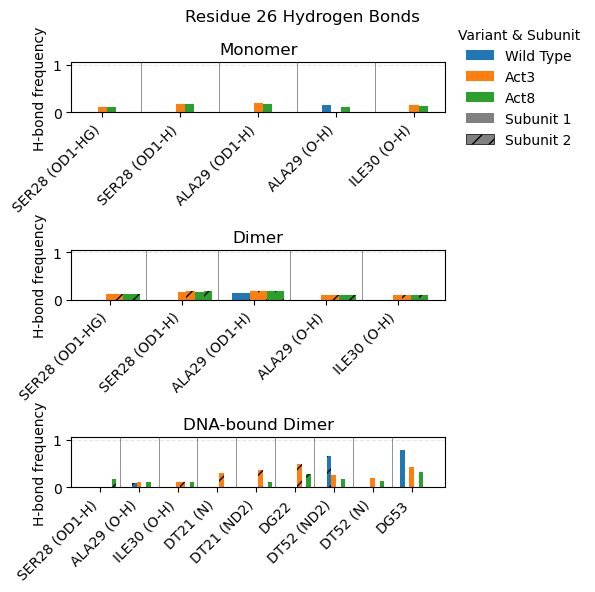

In [5]:
# --- Data ---
WTM26 = [0, 0, 0, 0.1465, 0]
A3M26 = [0.1229, 0.1665, 0.1925, 0, 0.1456]
A8M26 = [0.1197, 0.1655, 0.1791, 0.1035, 0.1281]
M26_partners = ['SER28 (OD1-HG)', 'SER28 (OD1-H)', 'ALA29 (OD1-H)', 'ALA29 (O-H)', 'ILE30 (O-H)']

WTdim1_26 = [0, 0, 0.1487, 0, 0]
WTdim2_26 = [0, 0, 0.1527, 0, 0]
A3dim1_26 = [0.1224, 0.1749, 0.1893, 0.1015, 0.1022]
A3dim2_26 = [0.1263, 0.1804, 0.1840, 0.1004, 0.1128]
A8dim1_26 = [0.1210, 0.1714, 0.1934, 0.1037, 0.1065]
A8dim2_26 = [0.1263, 0.1781, 0.1810, 0.1095, 0.1116]
dim26_partners = ['SER28 (OD1-HG)', 'SER28 (OD1-H)', 'ALA29 (OD1-H)', 'ALA29 (O-H)', 'ILE30 (O-H)']

WTdna1_26 = [0, 0, 0, 0, 0, 0, 0, 0, 0.7941] 
WTdna2_26 = [0, 0.1009, 0, 0, 0, 0, 0.6680, 0, 0]
A3dna1_26 = [0, 0.1036, 0.1056, 0, 0, 0, 0.2550, 0.2071, 0.4374]
A3dna2_26 = [0, 0, 0.1045, 0.3009, 0.3756, 0.4995, 0, 0, 0]
A8dna1_26 = [0, 0.1112, 0, 0, 0, 0, 0.1778, 0.1405, 0.3134]
A8dna2_26 = [0.1677, 0, 0.1126, 0, 0.1050, 0.2740, 0, 0, 0]
dna26_partners = ['SER28 (OD1-H)', 'ALA29 (O-H)', 'ILE30 (O-H)', 'DT21 (N)', 'DT21 (ND2)', 
                  'DG22', 'DT52 (ND2)', 'DT52 (N)', 'DG53']

# --- Plot Setup ---
fig, axs = plt.subplots(3, 1, figsize=(6, 6), constrained_layout=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['WT', 'Act3', 'Act8']
hatch_sub2 = '//'
# Plot monomer (no spacing issue)
plot_monomer_bars(axs[0], M26_partners, [WTM26, A3M26, A8M26], show_legend=True)

# Plot dimer and DNA-bound dimer with legends and subunit hatching
plot_pairwise_bars(axs[1], dim26_partners, [WTdim1_26, A3dim1_26, A8dim1_26], [WTdim2_26, A3dim2_26, A8dim2_26], title='Dimer')
plot_pairwise_bars(axs[2], dna26_partners, [WTdna1_26, A3dna1_26, A8dna1_26], [WTdna2_26, A3dna2_26, A8dna2_26], title='DNA-bound Dimer')

plt.suptitle('Residue 26 Hydrogen Bonds')
plt.tight_layout()

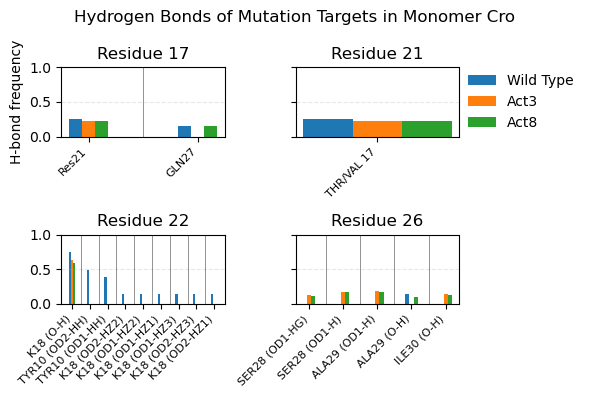

In [58]:
fig, ax=plt.subplots(2,2, sharey=True, figsize=(6,4))
def plot_monomer_bars(ax, partners, data_by_variant, title, show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (data, color, label) in enumerate(zip(data_by_variant, colors, labels)):
        shift = (i - 1) * group_spacing/2
        ax.bar(x + shift, data, width=bar_width, color=color, label=label)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right', fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
    # Custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            #Patch(facecolor='gray', label='Subunit 1'),
            #Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(
            handles=legend_elements,
            #title='Variant & Subunit',
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),  # push right of axes, vertically centered
            borderaxespad=0.0,
            frameon=False
        )
plot_monomer_bars(ax=ax[0,0], partners=M17_partners, title='Residue 17', data_by_variant=[WTM17, A3M17, A8M17], show_legend=False)
plot_monomer_bars(ax=ax[0,1], partners=M21_partners, title='Residue 21', data_by_variant=[WTM21, A3M21, A8M21], show_legend=True)
plot_monomer_bars(ax=ax[1,0], partners=M22_partners, title='Residue 22', data_by_variant=[WTM22, A3M22, A8M22], show_legend=False)
plot_monomer_bars(ax=ax[1,1], partners=M26_partners, title='Residue 26', data_by_variant=[WTM26, A3M26, A8M26], show_legend=False)
ax[0,0].set_ylabel('H-bond frequency')
plt.suptitle('Hydrogen Bonds of Mutation Targets in Monomer Cro')
plt.tight_layout()
plt.savefig('CroMhbonds.pdf')

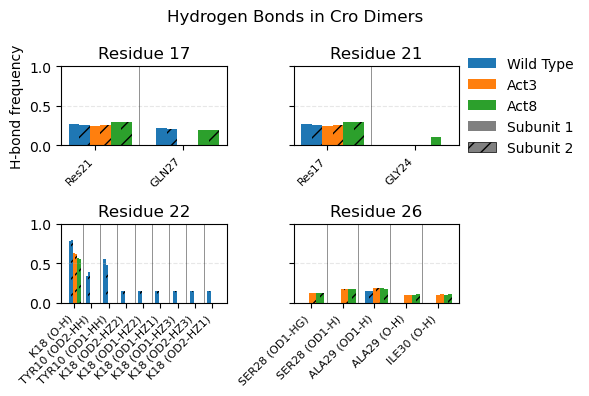

In [62]:
fig, ax=plt.subplots(2,2, sharey=True, figsize=(6,4))

def plot_pairwise_bars(ax, partners, sub1_data, sub2_data, title="", show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (sub1, sub2, color, label) in enumerate(zip(sub1_data, sub2_data, colors, labels)):
        shift = (i - 1) * group_spacing
        pos1 = x + shift
        pos2 = x + shift + bar_width

        # Subunit 1
        ax.bar(pos1, sub1, width=bar_width, color=color, label=label if show_legend else None)

        # Subunit 2
        ax.bar(pos2, sub2, width=bar_width, color=color, hatch=hatch_sub2)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right', fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
        # Create custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            Patch(facecolor='gray', label='Subunit 1'),
            Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(
            handles=legend_elements,
            #title='Variant & Subunit',
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),  # push right of axes, vertically centered
            borderaxespad=0.0,
            frameon=False
        )


plot_pairwise_bars(ax[0,0], dim17_partners, [WTdim1_17, A3dim1_17, A8dim1_17], [WTdim2_17, A3dim2_17, A8dim2_17], title='Residue 17')
plot_pairwise_bars(ax[0,1], dim21_partners, [WTdim1_21, A3dim1_21, A8dim1_21], [WTdim2_21, A3dim2_21, A8dim2_21], title='Residue 21', show_legend=True)
plot_pairwise_bars(ax[1,0], dim22_partners, [WTdim1_22, A3dim1_22, A8dim1_22], [WTdim2_22, A3dim2_22, A8dim2_22], title='Residue 22')
plot_pairwise_bars(ax[1,1], dim26_partners, [WTdim1_26, A3dim1_26, A8dim1_26], [WTdim2_26, A3dim2_26, A8dim2_26], title='Residue 26')

ax[0,0].set_ylabel('H-bond frequency')
plt.suptitle('Hydrogen Bonds in Cro Dimers')
plt.tight_layout()
plt.savefig('dimHbonds.pdf')

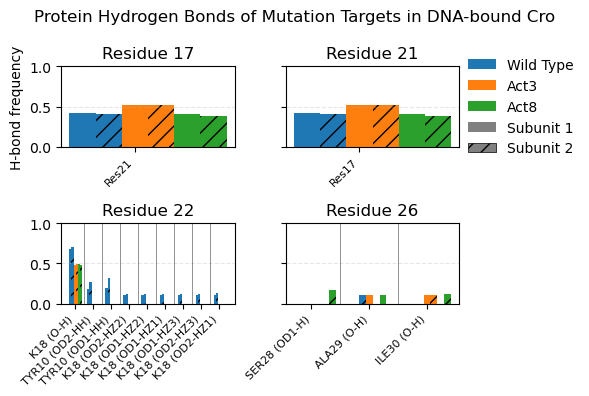

In [60]:
fig, ax=plt.subplots(2,2, sharey=True, figsize=(6,4))

def plot_pairwise_bars(ax, partners, sub1_data, sub2_data, title="", show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (sub1, sub2, color, label) in enumerate(zip(sub1_data, sub2_data, colors, labels)):
        shift = (i - 1) * group_spacing
        pos1 = x + shift
        pos2 = x + shift + bar_width

        # Subunit 1
        ax.bar(pos1, sub1, width=bar_width, color=color, label=label if show_legend else None)

        # Subunit 2
        ax.bar(pos2, sub2, width=bar_width, color=color, hatch=hatch_sub2)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right', fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
        # Create custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            Patch(facecolor='gray', label='Subunit 1'),
            Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(
            handles=legend_elements,
            #title='Variant & Subunit',
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),  # push right of axes, vertically centered
            borderaxespad=0.0,
            frameon=False
        )


plot_pairwise_bars(ax[0,0], [dna17_partners[0]], [WTdna1_17[0], A3dna1_17[0], A8dna1_17[0]], [WTdna2_17[0], A3dna2_17[0], A8dna2_17[0]], title='Residue 17')
plot_pairwise_bars(ax[0,1], dna21_partners, [WTdna1_21, A3dna1_21, A8dna1_21], [WTdna2_21, A3dna2_21, A8dna2_21], title='Residue 21', show_legend=True)
plot_pairwise_bars(ax[1,0], dna22_partners, [WTdna1_22, A3dna1_22, A8dna1_22], [WTdna2_22, A3dna2_22, A8dna2_22], title='Residue 22')
plot_pairwise_bars(ax[1,1], dna26_partners[0:3], [WTdna1_26[0:3], A3dna1_26[0:3], A8dna1_26[0:3]], [WTdna2_26[0:3], A3dna2_26[0:3], A8dna2_26[0:3]], title='Residue 26')

ax[0,0].set_ylabel('H-bond frequency')
plt.suptitle('Protein Hydrogen Bonds of Mutation Targets in DNA-bound Cro')
plt.tight_layout()
plt.savefig('dna_protHbonds.pdf')

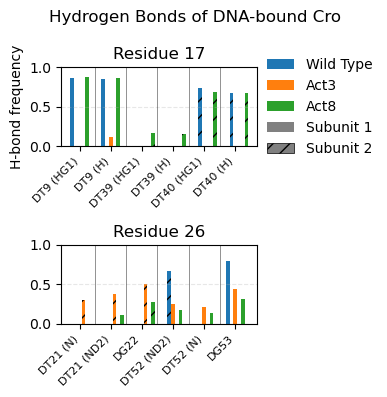

In [63]:
fig, ax=plt.subplots(2,1, sharey=True, figsize=(4,4))

def plot_pairwise_bars(ax, partners, sub1_data, sub2_data, title="", show_legend=False):
    n_bars = len(partners)
    bar_width = 0.12
    group_spacing = bar_width * 2
    x = np.arange(n_bars)

    for i, (sub1, sub2, color, label) in enumerate(zip(sub1_data, sub2_data, colors, labels)):
        shift = (i - 1) * group_spacing
        pos1 = x + shift
        pos2 = x + shift + bar_width

        # Subunit 1
        ax.bar(pos1, sub1, width=bar_width, color=color, label=label if show_legend else None)

        # Subunit 2
        ax.bar(pos2, sub2, width=bar_width, color=color, hatch=hatch_sub2)

    ax.set_xticks(x)
    ax.set_xticklabels(partners, rotation=45, ha='right', fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Draw vertical lines between interaction partners
    midpoints = (x[:-1] + x[1:]) / 2
    for mid in midpoints:
        ax.axvline(mid, color='black', linestyle='-', linewidth=0.5, alpha=0.6)

    if show_legend:
        # Create custom legend entries
        legend_elements = [
            Patch(facecolor=colors[0], label='Wild Type'),
            Patch(facecolor=colors[1], label='Act3'),
            Patch(facecolor=colors[2], label='Act8'),
            Patch(facecolor='gray', label='Subunit 1'),
            Patch(facecolor='gray', hatch='//', label='Subunit 2', edgecolor='black', linewidth=0.5)
        ]
        ax.legend(
            handles=legend_elements,
            #title='Variant & Subunit',
            loc='center left',
            bbox_to_anchor=(1.02, 0.5),  # push right of axes, vertically centered
            borderaxespad=0.0,
            frameon=False
        )


plot_pairwise_bars(ax[0], dna17_partners[1::], [WTdna1_17[1::], A3dna1_17[1::], A8dna1_17[1::]], [WTdna2_17[1::], A3dna2_17[1::], A8dna2_17[1::]], title='Residue 17', show_legend=True)
plot_pairwise_bars(ax[1], dna26_partners[3::], [WTdna1_26[3::], A3dna1_26[3::], A8dna1_26[3::]], [WTdna2_26[3::], A3dna2_26[3::], A8dna2_26[3::]], title='Residue 26')

ax[0].set_ylabel('H-bond frequency')
plt.suptitle('Hydrogen Bonds of DNA-bound Cro')
plt.tight_layout()
plt.savefig('dnaHbonds.pdf')